<a href="https://colab.research.google.com/github/AmruthaAN/Amrutha-ml-project/blob/main/used_device_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Used Device Price Prediction**

OBJECTIVE-\
    The objective is to do Exploratory Data Analytics and create the best model which can help in pricing of used devices.


*   device_brand: Name of manufacturing brand

*   os: OS on which the device runs

*   screen_size: Size of the screen in cm

*   4g: Whether 4G is available or not

*   5g: Whether 5G is available or not

*   front_camera_mp: Resolution of the rear camera in megapixels
*   back_camera_mp: Resolution of the front camera in megapixels


*   internal_memory: Amount of internal memory (ROM) in GB


*   ram: Amount of RAM in GB


*   battery: Energy capacity of the device battery in mAh


*   weight: Weight of the device in grams


*   release_year: Year when the device model was released

*   days_used: Number of days the used/refurbished device has been used
*   normalized_new_price: Normalized price of a new device of the same model

*   normalized_used_price (TARGET): Normalized price of the used/refurbished device




In [ ]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#load data

df=pd.read_csv('/content/used_device_data.csv')

In [ ]:
df.sample(5)

,device_brand,os,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
2089,Nokia,Windows,25.43,yes,no,6.7,2.0,32.0,4.00,1200.0,615.0,2013,1067,4.978319,5.882431
324,Micromax,Android,10.03,no,no,2.0,0.3,0.2,0.25,2000.0,85.0,2013,652,3.404857,4.268998
3363,LG,Android,15.77,yes,no,8.0,13.0,64.0,6.00,3550.0,181.0,2019,249,4.602667,5.715184
2367,Samsung,Android,12.93,yes,no,12.0,25.0,64.0,4.00,3100.0,140.0,2019,355,4.884996,5.512703
2682,Sony,Android,12.75,yes,no,19.0,13.0,64.0,4.00,2700.0,155.0,2017,636,4.511409,5.559604


In [ ]:
df.shape

(3454, 15)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   device_brand           3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   rear_camera_mp         3275 non-null   float64
 6   front_camera_mp        3452 non-null   float64
 7   internal_memory        3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe()

,screen_size,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
count,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000
mean,13.713115,9.384534,6.553329,54.546957,4.036080,3133.170961,182.705761,2015.965258,674.869716,4.364712,5.233107
std,3.805280,4.700148,6.968453,84.926611,1.364314,1298.565062,88.329494,2.298455,248.580166,0.588914,0.683637
min,5.080000,0.080000,0.000000,0.010000,0.020000,500.000000,69.000000,2013.000000,91.000000,1.536867,2.901422
25%,12.700000,5.000000,2.000000,16.000000,4.000000,2100.000000,142.000000,2014.000000,533.500000,4.033931,4.790342
50%,12.830000,8.000000,5.000000,32.000000,4.000000,3000.000000,160.000000,2015.500000,690.500000,4.405133,5.245892
75%,15.340000,13.000000,8.000000,64.000000,4.000000,4000.000000,185.000000,2018.000000,868.750000,4.755700,5.673718
max,30.710000,48.000000,32.000000,1024.000000,12.000000,9720.000000,855.000000,2020.000000,1094.000000,6.619433,7.847841


In [ ]:
#Missing value calculation & filling

df.isna().sum()

device_brand             0
os                       0
screen_size              0
4g                       0
5g                       0
rear_camera_mp           0
front_camera_mp          0
internal_memory          0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

In [ ]:
features=['rear_camera_mp','front_camera_mp','internal_memory','ram','battery','weight']
for i in features:
  df[i]=df[i].fillna(df[i].median())

In [ ]:
df.isnull().sum()

device_brand             0
os                       0
screen_size              0
4g                       0
5g                       0
rear_camera_mp           0
front_camera_mp          0
internal_memory          0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

### **count plot**



/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


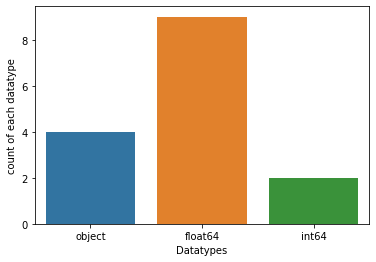

In [ ]:
sns.countplot(df.dtypes,data=df)
plt.xlabel("Datatypes")
plt.ylabel("count of each datatype")
plt.show()

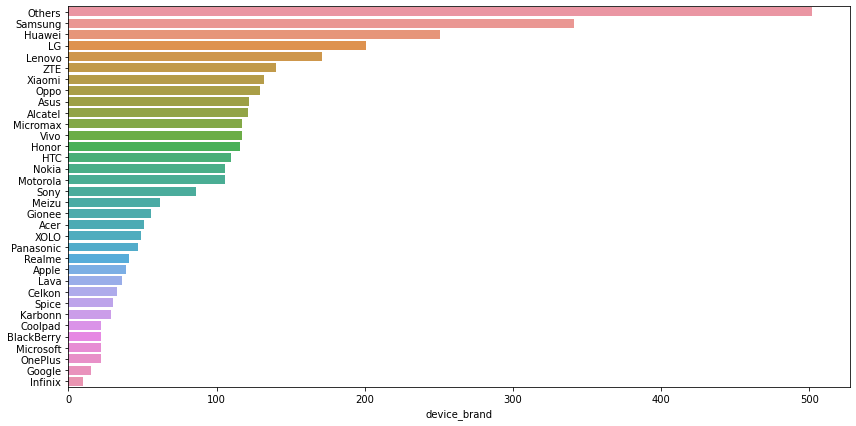

In [ ]:
plt.figure(figsize=(14,7))
count=df['device_brand'].value_counts().sort_values(ascending=False)
sns.barplot(y=count.index,x=count)
plt.show()

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


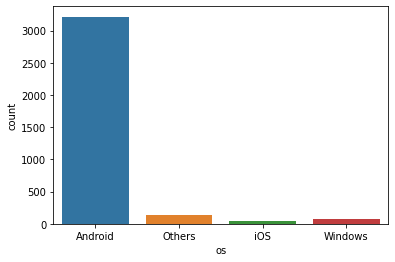

In [ ]:
sns.countplot('os',data=df)
plt.show()

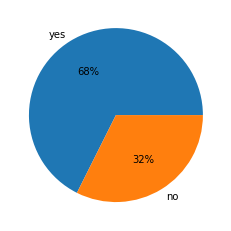

In [ ]:
y=df['4g'].value_counts()
plt.pie(y,labels=y.index,autopct='%0.0f%%')
plt.show()

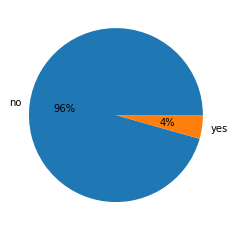

In [ ]:
y=df['5g'].value_counts()
plt.pie(y,labels=y.index,autopct='%0.0f%%')
plt.show()

### **histogram**

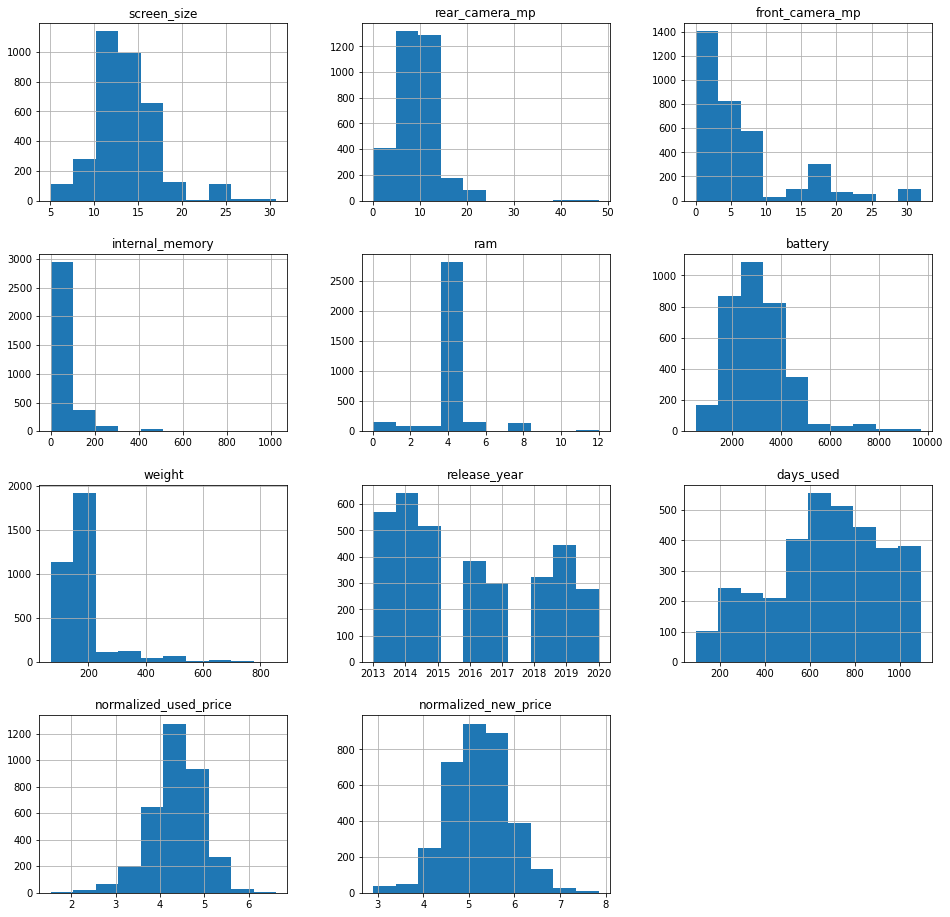

In [ ]:
df.hist(figsize=(16,16))
plt.show()

 
### observations

*   Samsung is the most reused phone next to phone brands which are categorized as Others.
*   There are more people using Android OS

*   Screen size is mostly between 10-15 
*   4g users are more and 5g users are less

*   Rear camera mp range is mostly between 5-15 mega pixels
*   Front camera mp range is mostly between 0-10 mega pixels


*   Internal memory is mostly between 0-100
*   Ram storage is mostly between 3-5 GB

*   Battery life is mostly around 3000 mah

*   Weight is around 150-210 grams

*   Most of the phones were released between 2013-2015
*   People have used the phones on an average between 600-800 days which is approximately 2-2.5 years


*   Average normalized used price is between 4-5


*   Average normalized new price is between 5-6




### **correlation**

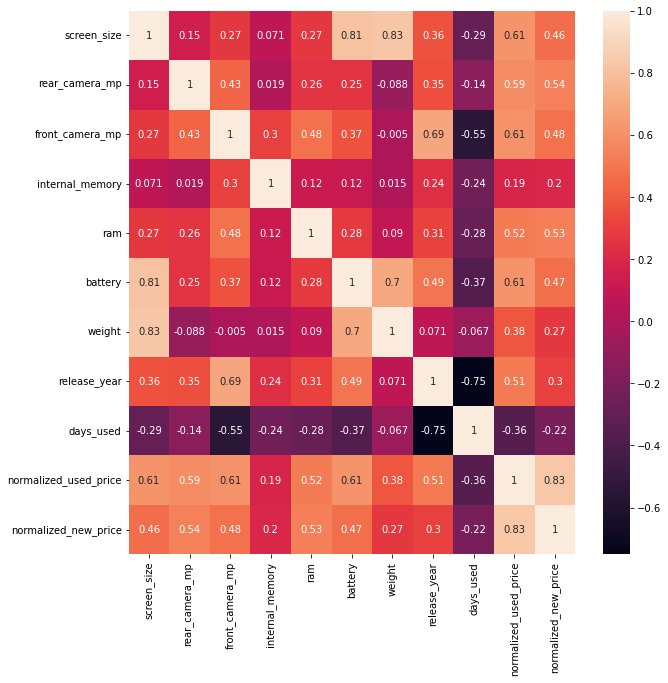

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

### **Regression Plot**

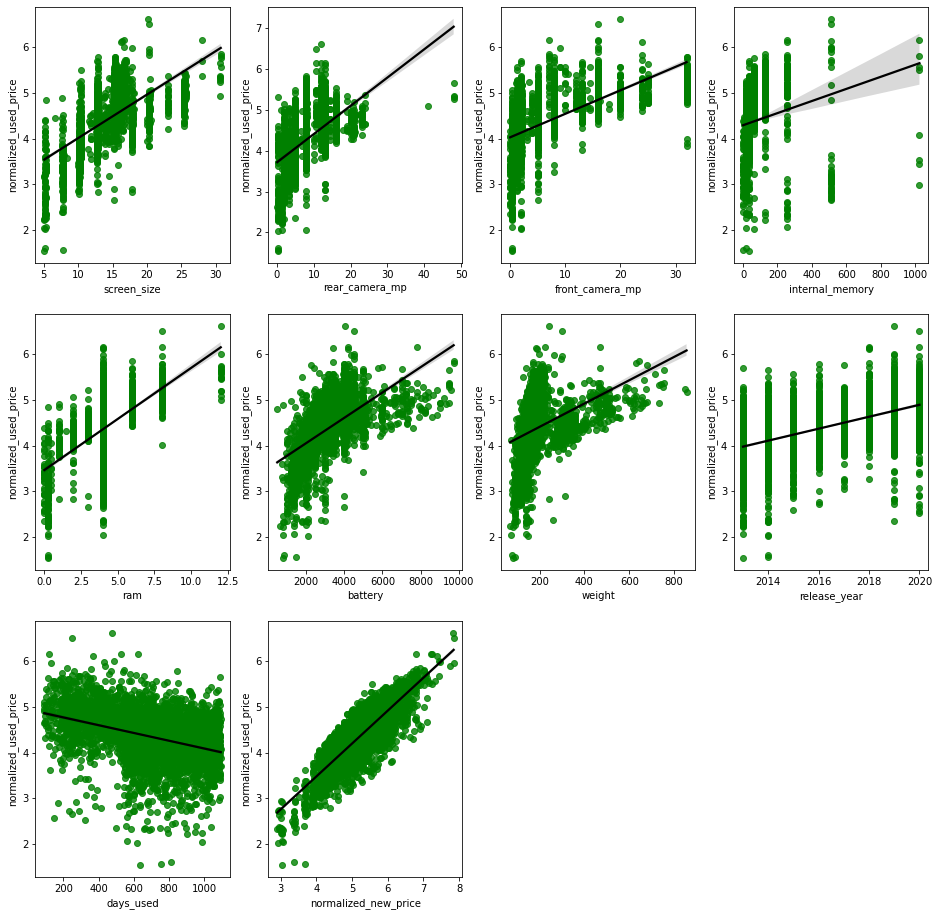

In [ ]:
num_feature=[i for i in df.columns if df[i].dtype!='O' and i!='normalized_used_price']
plt.figure(figsize=(16,16))
for i in enumerate(num_feature):
  plt.subplot(3,4,i[0]+1)
  sns.regplot(x=i[1],y='normalized_used_price',data=df,color='black',scatter_kws={"color":"green"})

### Observations


*  Most of them have positive correlation with normalized used price except days used
*   days used is negatively correlated to used price



### **Box plot**

In [ ]:
num_features=[i for i in df.columns if df[i].dtype!='O']
cat_features=[i for i in df.columns if df[i].dtype=='O']

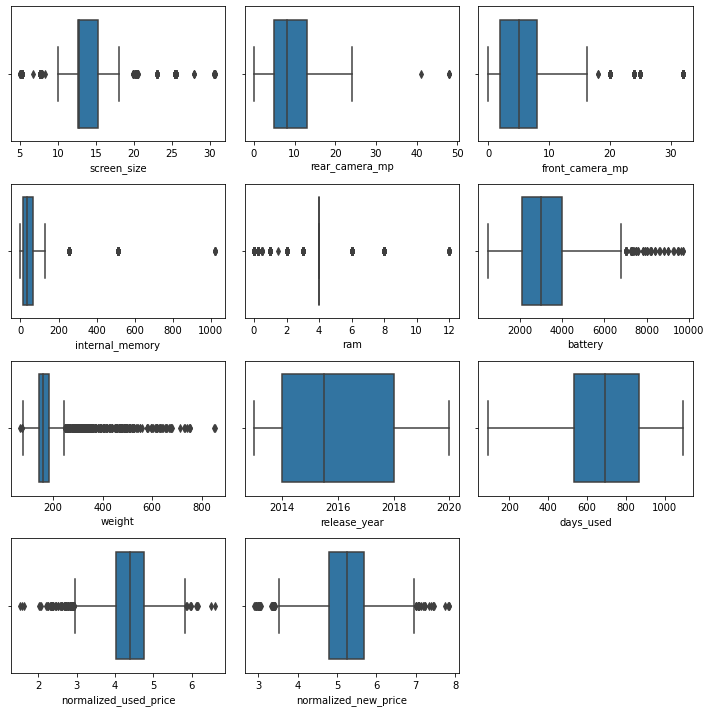

In [ ]:
fig = plt.figure(figsize=(10,10))

for i in range(len(num_features)):
    plt.subplot(4,3,i+1)
    sns.boxplot(data=df,x=df[num_features[i]])

plt.tight_layout()
plt.show()

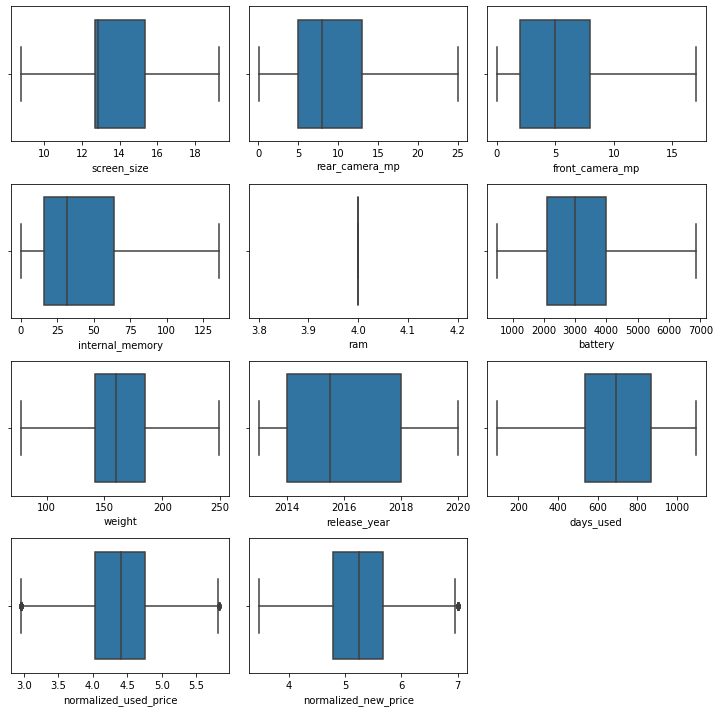

In [ ]:
#outliers removal

def limit(features):
  q1=df[features].quantile(0.25)
  q3=df[features].quantile(0.75)
  iqr=q3-q1
  ll=round(q1-1.5*iqr,2)
  ul=round(q3+1.5*iqr,2)
  df[features]=np.where(df[features]>ul,ul,np.where(df[features]<ll,ll,df[features]))
  
fig = plt.figure(figsize=(10,10))
for j in num_features:
  limit(j)
for i in range(len(num_features)):
  plt.subplot(4,3,i+1)
  sns.boxplot(data=df,x=df[num_features[i]])

plt.tight_layout()
plt.show()

In [ ]:
#encoding categorical features

dummy=pd.get_dummies(df[['device_brand','os','4g','5g']],drop_first=True)
dummy

,device_brand_Alcatel,device_brand_Apple,device_brand_Asus,device_brand_BlackBerry,device_brand_Celkon,device_brand_Coolpad,device_brand_Gionee,device_brand_Google,device_brand_HTC,device_brand_Honor,...,device_brand_Spice,device_brand_Vivo,device_brand_XOLO,device_brand_Xiaomi,device_brand_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,1
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,1
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,1
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3449,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3450,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3451,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3452,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
dfe=pd.concat([df,dummy],axis=1)
dfe.head()

,device_brand,os,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,...,device_brand_Spice,device_brand_Vivo,device_brand_XOLO,device_brand_Xiaomi,device_brand_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,4.0,3020.0,...,0,0,0,0,0,0,0,0,1,0
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,4.0,4300.0,...,0,0,0,0,0,0,0,0,1,1
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,4.0,4200.0,...,0,0,0,0,0,0,0,0,1,1
3,Honor,Android,19.30,yes,yes,13.0,8.0,64.0,4.0,6850.0,...,0,0,0,0,0,0,0,0,1,1
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,4.0,5000.0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
dfe=dfe.drop(['device_brand','os','4g','5g'],axis=1)
dfe.head()

,screen_size,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,...,device_brand_Spice,device_brand_Vivo,device_brand_XOLO,device_brand_Xiaomi,device_brand_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,14.50,13.0,5.0,64.0,4.0,3020.0,146.0,2020.0,127.0,4.307572,...,0,0,0,0,0,0,0,0,1,0
1,17.30,13.0,16.0,128.0,4.0,4300.0,213.0,2020.0,325.0,5.162097,...,0,0,0,0,0,0,0,0,1,1
2,16.69,13.0,8.0,128.0,4.0,4200.0,213.0,2020.0,162.0,5.111084,...,0,0,0,0,0,0,0,0,1,1
3,19.30,13.0,8.0,64.0,4.0,6850.0,249.5,2020.0,345.0,5.135387,...,0,0,0,0,0,0,0,0,1,1
4,15.32,13.0,8.0,64.0,4.0,5000.0,185.0,2020.0,293.0,4.389995,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
#splitting the data into training and testing data

x=dfe.drop(['normalized_used_price'],axis=1)
x.head()

,screen_size,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_new_price,...,device_brand_Spice,device_brand_Vivo,device_brand_XOLO,device_brand_Xiaomi,device_brand_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,14.50,13.0,5.0,64.0,4.0,3020.0,146.0,2020.0,127.0,4.715100,...,0,0,0,0,0,0,0,0,1,0
1,17.30,13.0,16.0,128.0,4.0,4300.0,213.0,2020.0,325.0,5.519018,...,0,0,0,0,0,0,0,0,1,1
2,16.69,13.0,8.0,128.0,4.0,4200.0,213.0,2020.0,162.0,5.884631,...,0,0,0,0,0,0,0,0,1,1
3,19.30,13.0,8.0,64.0,4.0,6850.0,249.5,2020.0,345.0,5.630961,...,0,0,0,0,0,0,0,0,1,1
4,15.32,13.0,8.0,64.0,4.0,5000.0,185.0,2020.0,293.0,4.947837,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
y=dfe['normalized_used_price']
y

0       4.307572
1       5.162097
2       5.111084
3       5.135387
4       4.389995
          ...   
3449    4.492337
3450    5.037732
3451    4.357350
3452    4.349762
3453    4.132122
Name: normalized_used_price, Length: 3454, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((2417, 48), (1037, 48), (2417,), (1037,))

### **Model Creation & Performance Evaluation**

In [ ]:
from sklearn.linear_model import LinearRegression
lr_model=LinearRegression()
from sklearn.tree import DecisionTreeRegressor
dt_model=DecisionTreeRegressor()
from sklearn.ensemble import RandomForestRegressor
rf_model=RandomForestRegressor()

from sklearn.metrics import mean_absolute_percentage_error,mean_squared_error,r2_score

model_list=[lr_model,dt_model,rf_model]

In [ ]:
for i in model_list:
  print(i)
  i.fit(x_train,y_train)
  y_pred=i.predict(x_test)
  print("*"*50,'\n')
  print('mean_absolute_percentage_error:',mean_absolute_percentage_error(y_pred,y_test),'\n')
  print('mean_squared_error:',mean_squared_error(y_pred,y_test),'\n')
  print('r2_score:',r2_score(y_pred,y_test),'\n')
  print("-"*50)

LinearRegression()
************************************************** 

mean_absolute_percentage_error: 0.04158675791379127 

mean_squared_error: 0.05051976345753218 

r2_score: 0.8013778135893734 

--------------------------------------------------
DecisionTreeRegressor()
************************************************** 

mean_absolute_percentage_error: 0.05384385799836278 

mean_squared_error: 0.09411702634320028 

r2_score: 0.7047664205488835 

--------------------------------------------------
RandomForestRegressor()
************************************************** 

mean_absolute_percentage_error: 0.04032404415633289 

mean_squared_error: 0.04835044158767715 

r2_score: 0.8135839769815565 

--------------------------------------------------
